In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [293]:
train = pd.read_csv("/content/train.csv")

In [294]:
train.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [295]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [296]:
train.shape

(4572, 5)

In [297]:
train.isna().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [298]:
train.dropna()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [300]:
train.dropna()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [301]:
X = train.drop(columns = "Sales")

In [302]:
X

,TV,Radio,Social Media,Influencer
0,16.0,6.566231,2.907983,Mega
1,13.0,9.237765,2.409567,Mega
2,41.0,15.886446,2.913410,Mega
3,83.0,30.020028,6.922304,Mega
4,15.0,8.437408,1.405998,Micro
...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro
4568,71.0,20.610685,6.545573,Nano
4569,44.0,19.800072,5.096192,Micro
4570,71.0,17.534640,1.940873,Macro


In [303]:
Y = train["Sales"]

In [304]:
Y

0        54.732757
1        46.677897
2       150.177829
3       298.246340
4        56.594181
           ...    
4567     94.685866
4568    249.101915
4569    163.631457
4570    253.610411
4571    148.202414
Name: Sales, Length: 4572, dtype: float64

In [305]:
from sklearn.preprocessing import LabelEncoder

In [306]:
le = LabelEncoder()


In [319]:
for i in X.columns:
  X[i] = le.fit_transform(X[i])
Y = le.fit_transform(Y)

In [320]:
from sklearn.model_selection import train_test_split

In [321]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , random_state = 2 , test_size = 0.2)

In [322]:
X_train

,TV,Radio,Social Media,Influencer
459,9,949,1111,0
1993,53,2214,1535,2
3860,8,348,1034,1
272,80,4292,3352,0
3543,23,311,1703,1
...,...,...,...,...
3335,45,1201,1568,2
1099,17,443,2661,3
2514,3,836,377,1
3606,41,3662,1467,2


In [323]:
X_test

,TV,Radio,Social Media,Influencer
322,64,3728,2127,3
3011,7,104,145,3
1362,17,1010,1656,1
4344,73,3572,2715,0
2841,32,983,2601,1
...,...,...,...,...
1954,69,3383,3996,3
3424,16,1876,2712,2
3133,63,2132,3190,2
3966,8,607,1225,3


In [324]:
from sklearn.linear_model import LinearRegression

In [325]:
model = LinearRegression()

In [326]:
for i in X.columns:
  X[i] = le.fit_transform(X[i])
Y = le.fit_transform(Y)

In [327]:
model.fit(X_train, Y_train)

LinearRegression()

In [328]:
model_prediction = model.predict(X_test)

In [329]:
model.score(X , Y)

0.9830214647395804

In [330]:
from sklearn.metrics import r2_score
r2_score(Y_test, model_prediction)

0.9779570767965456

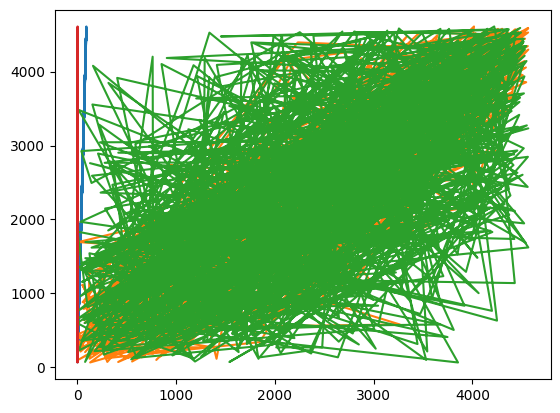

In [333]:
plt.plot(X_test , model.predict(X_test))